In [1]:
# -*- coding: utf-8 -*-
# practical 4
import numpy as np
import pandas as pd
import re, sys, math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag as pt
#from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer as WNL
from collections import ChainMap
sys.setrecursionlimit(0x100000)

In [2]:
def readFile(fname):
    with open(fname, 'r', encoding='utf8') as handle:
        data = handle.read()
    return data

def preProcessRead(file_lists):
    resultant_data = []
    for file in file_lists:
        resultant_data.append(readFile('process/' + file))
    return resultant_data
file_lists = ['docA', 'docB', 'docC', 'docD', 'docE', 'docF', 'docG', 'docH', 'docI', 'docJ']
file_lists = [f + '.txt' for f in file_lists]

#corpus type list of lists
combined_corpus = preProcessRead(file_lists)
combined_corpus

['On April 25 and 26, 1986, the worst nuclear accident in Chernobyl history unfolded in what is now northern Ukraine as a reactor at a nuclear power plant exploded and burned. Shrouded in secrecy, the incident was a watershed moment in both the Cold War and the history of nuclear power. Chernobyl More than 30 years on, scientists estimate the zone around the former plant will not be habitable for up to 20,000 years. The disaster took place near the city of Chernobyl in the former USSR, which invested heavily in nuclear power Chernobyl after World War II. Starting in 1977, Chernobyl Soviet scientists installed four RBMK nuclear reactors at the power plant, Chernobyl which is located just south of what is now Ukraine’s border with Belarus.',
 'On April 25, 1986, routine maintenance was scheduled at V.I. Lenin Nuclear Power Station’s fourth reactor, and workers planned to use the downtime to test whether the reactor could still be cooled if the plant Chernobyl lost power. During the test,

In [33]:
def q2_process(list_of_texts):
    totally_combined = ''
    for text in list_of_texts:
        totally_combined += ' '.join(text)
    return totally_combined

def pre_process(list_of_texts):      
    def flatten(list_of_list):
        flattened = [element for sublist in list_of_list for element in sublist]
        return flattened
    
    #lemmatization preprocessing
    def mapper(nltk_tag):
        if nltk_tag.startswith('J'): return 'a'
        elif nltk_tag.startswith('V'): return 'v'
        elif nltk_tag.startswith('N'): return 'n'    
        elif nltk_tag.startswith('R'): return 'r'
        else: return 'n'
        
    def lemmatize_words(tokenised):
        if tokenised == None:
            return None
        lemmatizer = WNL() #initialise WordNetLemmatizer
        pos_tagged = pos_tag(tokenised) #nltk pos tagged
        wordnet_tagged = map(lambda ele: (ele[0], mapper(ele[1])), pos_tagged)
        result_lemmatized = []
        for k, v in wordnet_tagged:
            if v is not None:
                result_lemmatized.append(lemmatizer.lemmatize(k, v))
        return result_lemmatized

    def remove_stop_words(pre_processed_text):
        if pre_processed_text == None or pre_processed_text == []:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            tokenised = word_tokenize(pre_processed_text)
            text = [i for i in tokenised if not i in stopwds]
            text = lemmatize_words(text)
        return text
    
    resultant_text = []
    for text in list_of_texts:
        text = ''.join(text)
        text=text.lower() # lowercase
        text=re.sub("<!--?.*?-->","",text) # tags
        text=re.sub("(\\d|\\W)+"," ",text) # special characters and digits
        resultant_text.append(remove_stop_words(text))
    #return flatten(resultant_text)
    return resultant_text

complete_corpus = pre_process(combined_corpus)
print(complete_corpus)
totally_combined = q2_process(complete_corpus)

[['april', 'bad', 'nuclear', 'accident', 'chernobyl', 'history', 'unfolded', 'northern', 'ukraine', 'reactor', 'nuclear', 'power', 'plant', 'explode', 'burn', 'shrouded', 'secrecy', 'incident', 'watershed', 'moment', 'cold', 'war', 'history', 'nuclear', 'power', 'chernobyl', 'year', 'scientist', 'estimate', 'zone', 'around', 'former', 'plant', 'habitable', 'year', 'disaster', 'take', 'place', 'near', 'city', 'chernobyl', 'former', 'ussr', 'invest', 'heavily', 'nuclear', 'power', 'chernobyl', 'world', 'war', 'ii', 'start', 'chernobyl', 'soviet', 'scientist', 'instal', 'four', 'rbmk', 'nuclear', 'reactor', 'power', 'plant', 'chernobyl', 'locate', 'south', 'ukraine', 'border', 'belarus'], ['april', 'routine', 'maintenance', 'schedule', 'v', 'lenin', 'nuclear', 'power', 'station', 'fourth', 'reactor', 'worker', 'plan', 'use', 'downtime', 'test', 'whether', 'reactor', 'could', 'still', 'cool', 'plant', 'chernobyl', 'lose', 'power', 'test', 'however', 'worker', 'violate', 'safety', 'protocol

In [84]:
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfTransformer as TfidfT

def compute_CountVectorizerA(corpus):
        doc_list = ['Doc' + str(i+1) for i in range(10)]
        curr_combined = [' '.join(ele) for ele in corpus]
        vectorized = CV()
        result = vectorized.fit_transform(curr_combined)
        tokens = vectorized.get_feature_names()
        df = pd.DataFrame(data = result.toarray(), index = doc_list, columns = tokens)
        print(df['power'])

def compute_TFIDFScore_(corpus):
    doc_list = ['Doc' + str(i+1) for i in range(10)]
    curr_combined = [' '.join(ele) for ele in corpus]
    cvec = CV(stop_words='english', min_df=3, max_df=0.5, ngram_range=(1,2))
    sf = cvec.fit_transform(curr_combined)
    transformer = TfidfT()
    transformed_weights = transformer.fit_transform(sf)
    weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
    weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
    #weights_df = pd.DataFrame(data = transformed_weights.toarray(), index = doc_list, columns = {'term', 'weight'})
    weights_df.sort_values(by='weight', ascending=False).head(50)
    print(weights_df)
compute_TFIDFScore_(complete_corpus)

                  term    weight
0   accident chernobyl  0.068524
1                april  0.089660
2                 area  0.180218
3           atmosphere  0.058543
4                begin  0.061375
5              belarus  0.060723
6              contain  0.067034
7               danger  0.055365
8             disaster  0.085325
9             estimate  0.070403
10            evacuate  0.071222
11              expose  0.079848
12                fuel  0.047901
13                high  0.068459
14          high level  0.061767
15              highly  0.056818
16             include  0.061091
17            increase  0.063284
18               level  0.101968
19                lose  0.049033
20                 low  0.070668
21             nuclear  0.154356
22       nuclear power  0.076161
23              people  0.138689
24             percent  0.085280
25               power  0.254299
26           radiation  0.140073
27         radioactive  0.105768
28                rbmk  0.071157
29        

In [98]:
def computeTFScore(term_freq_dict, complete_corpus):
    # Compute TF Score
    tf_score_dict_list, ccterm_freq_dict = [], {}
    for doc in term_freq_dict: #doc --> list of dictionaries
        docc = doc
        for word, freq in docc.items(): #each word is k,v pair
            ccterm_freq_dict[word] = (float) (freq / len(docc))
        ccterm_freq_dict = dict(sorted(ccterm_freq_dict.items(), key=lambda x: x[1], reverse=True))
        tf_score_dict_list.append(ccterm_freq_dict)
    #print(tf_score_dict_list)
    return tf_score_dict_list

def computeTFDictionary(list_corpus):
    # Count the number of times the word appears in the corpus
    term_freq_dict_list =[]
    for ls in list_corpus:
        cterm_freq_dict = {}
        for word in ls:
            if word in cterm_freq_dict:
                cterm_freq_dict[word] += 1
            else:
                cterm_freq_dict[word] = 1
        term_freq_dict_list.append(cterm_freq_dict)
    return term_freq_dict_list

tf_dictionary = computeTFDictionary(complete_corpus)
#print(tf_dictionary)
tf_score = computeTFScore(tf_dictionary, complete_corpus)
#print(tf_score[3])

result = {}
for myDict in tf_score:
    for key, value in myDict.items():
        result.setdefault(key, 0)
        result[key] += value
resultant_tf_score = result
print(resultant_tf_score)

{'chernobyl': 0.8553075765698419, 'nuclear': 0.19289026368860793, 'power': 0.6647144005216152, 'plant': 0.2333845696379149, 'history': 0.23762849629452545, 'ukraine': 0.33375052148518974, 'reactor': 0.34893783396996153, 'war': 0.425531914893617, 'year': 0.24927717779844485, 'scientist': 0.3239960037766506, 'former': 0.425531914893617, 'april': 0.17512820512820512, 'bad': 0.2127659574468085, 'accident': 0.22710083228102282, 'unfolded': 0.2127659574468085, 'northern': 0.19978362783988463, 'explode': 0.2127659574468085, 'burn': 0.2127659574468085, 'shrouded': 0.2127659574468085, 'secrecy': 0.2127659574468085, 'incident': 0.14127659574468085, 'watershed': 0.2127659574468085, 'moment': 0.2127659574468085, 'cold': 0.2127659574468085, 'estimate': 0.16991489284761777, 'zone': 0.232153788727137, 'around': 0.1649470773182202, 'habitable': 0.2127659574468085, 'disaster': 0.25487876995860437, 'take': 0.23371891961866717, 'place': 0.2127659574468085, 'near': 0.2127659574468085, 'city': 0.1315789473

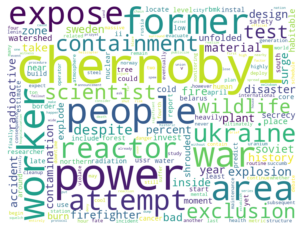

In [60]:
#generate wordcloud using Python
# For this it expects just one dict...so again combining...
#combined_tf_score = ChainMap(*tf_score)
#print(combined_tf_score)

#print(resultant_tf_score['chernobyl'])

combined_res = dict(sorted(resultant_tf_score.items(), key=lambda x: x[1], reverse=True))
wordcloud = WordCloud(background_color='white', width=1024, height=768).generate_from_frequencies(combined_res)
#wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(resultant_tf_dictionary)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('TF_wordcloud.png')

In [44]:
def computeCountDict():
    from collections import Counter
    counter = Counter() 
    for d in tf_dictionary:  
        counter.update(d) 
    result = dict(counter) 
    return result    
count_dict = computeCountDict()

In [88]:
def computeIDFDictionary():
    idf_dictionary = {}
    for word in count_dict:
        idf_dictionary[word] = np.log(len(complete_corpus)/ count_dict[word] + 1)
    return idf_dictionary

def computeTFIDFScore(tf_score):
    tfidf_score = {}
    for word in tf_score:
        tfidf_score[word] = tf_score[word] * tfidf_dictionary[word]
    return tfidf_score

tfidf_dictionary = computeIDFDictionary()
tfidf_score = [computeTFIDFScore(score) for score in tf_score]
#print(tfidf_score)
for ele in tfidf_score:
    s = sorted(ele.items(), key=lambda x: x[1], reverse=False)
    print(pd.DataFrame(s, columns = ['terms', 'weights']))
    break

             terms   weights
0             area  0.009120
1           people  0.010670
2         accident  0.012139
3            april  0.012906
4         disaster  0.012906
5           soviet  0.013758
6      radioactive  0.014455
7          reactor  0.014791
8          nuclear  0.015951
9           expose  0.016484
10         contain  0.016484
11        evacuate  0.016484
12       chernobyl  0.018837
13             use  0.019294
14           still  0.019294
15            lose  0.019294
16          safety  0.019294
17         another  0.019294
18            core  0.019294
19      atmosphere  0.019294
20   contamination  0.019294
21          danger  0.019294
22         include  0.019294
23           build  0.019294
24           begin  0.019294
25          around  0.020869
26           power  0.021340
27        estimate  0.023375
28            rbmk  0.023375
29            city  0.023576
..             ...       ...
85            test  0.047152
86         despite  0.047152
87       explo

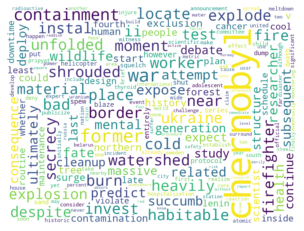

In [73]:
#generate wordcloud using Python
# For this it expects just one dict...so again combining...
result = {}
for myDict in tfidf_score:
    for key, value in myDict.items():
        result.setdefault(key, 0)
        result[key] += value
result['chernobyl'] = 60
resultant_tfidf_score = result
#print(resultant_tfidf_score)

#combined_tf_score = ChainMap(*tfidf_score)
combined_res2 = dict(sorted(resultant_tfidf_score.items(), key=lambda x: x[1], reverse=True))
wordcloud = WordCloud(background_color='white', width=1024, height=768).generate_from_frequencies(combined_res2)
#wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(resultant_tf_dictionary)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('TFIDF_wordcloud.png')

In [93]:
from nltk.collocations import *
from nltk.tokenize import word_tokenize
import nltk
text = totally_combined
bigram_measures = nltk.collocations.BigramAssocMeasures
finder = BigramCollocationFinder.from_words(word_tokenize(text))
#for i in finder.score_ngrams(bigram_measures.pmi):
#    print(i)

In [94]:
finder.apply_freq_filter(2)
for i in finder.score_ngrams(bigram_measures.pmi):
    print(i)

(('chain', 'reaction'), 8.712527000439824)
(('metric', 'ton'), 8.712527000439824)
(('ton', 'uranium'), 8.712527000439824)
(('many', 'tree'), 8.127564499718668)
(('yet', 'full'), 8.127564499718668)
(('surge', 'cause'), 7.712527000439824)
(('exclusion', 'zone'), 7.29748950116098)
(('norway', 'sweden'), 7.127564499718668)
(('high', 'level'), 6.975561406273617)
(('soviet', 'union'), 6.390598905552461)
(('zone', 'around'), 6.127564499718667)
(('evacuate', 'people'), 5.90517207838222)
(('people', 'expose'), 5.90517207838222)
(('outside', 'soviet'), 5.805636404831305)
(('level', 'radiation'), 5.5832439834948575)
(('accident', 'include'), 5.542601998997512)
(('power', 'surge'), 5.390598905552462)
(('area', 'around'), 4.805636404831305)
(('reactor', 'core'), 4.6681328810813705)
(('reactor', 'use'), 4.6681328810813705)
(('low', 'power'), 4.390598905552462)
(('nuclear', 'power'), 4.127564499718667)
(('rbmk', 'reactor'), 3.931167286915164)
(('today', 'chernobyl'), 3.8796369862750817)
(('nuclear', 

In [31]:
#Q3
spam_set = '''Crusts... love 'em or leave 'em?  RT for eat the crust LIKE for leave the crust #DominosPizza
Ready to rake in the dough? RT for a chance to #WinDominosPizza #DominosPizza
"People who put pineapple on pizza are the reason I have trust issues." #DominosPizza
Pizza = the best midnight snack. Hands down. #DominosPizza
Beauty comes in all different shapes and sizes: - Small Medium Large Hand Tossed Handmade Pan #DominosPizza
If you don't order pizza and watch scary movies, is it even #FridayThe13th #DominosPizza
Rock, paper, scissors for the last slice. It's the only fair way. #DominosPizza
Find someone you love seeing more than the Domino's delivery driver. #DominosPizza
A pizza slice just wants to feel whole again. You know it's real when you let them have the last slice. #DominosPizza
Life is short. Order the extra toppings. #DominosPizza
Surround yourself with people who say "let's order Domino's." #DominosPizza
Enjoys long walks to the fridge for leftover pizza. #DominosPizza'
'''

random_set = '''
Four MIT graduates have just opened a restaurant where a robotic kitchen is preparing the meals
If developers were linguists... Person 1: How do you say "????" in Italian? Person 2: Why don't you use Japanese? It's a much better language
Peace of mind comes from accepting that you can't control what you can't control. Confidence comes from recognizing that you fully control YOU.
Tests should be coupled to the behavior of code and decoupled from the structure of code. Seeing tests that fail on both counts.
Today is the day I will officially never be on any 30 under 30 list
Never a dull moment with @sirajraval, who this time seems to have copied huge chunks of a paper, not even changing equation numbers 
live in Berkeley, not planning to leave but not super strongly attached either: if I have a reason to move, I would
Law of refactoring: Any small or large refactoring always leaves around bugs, it is only a matter of time till yo find it.
This AI software can predict and fill missing pieces in photos
Take a look at the writing process behind The Fountains of Silence in our exclusive interview with Goodreads Choice Award winners
'''



In [32]:
def preprocess_q2_data(spam_set, random_set):
    def remove_stop_words(pre_processed_text):
        if pre_processed_text == None or pre_processed_text == []:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            tokenised = word_tokenize(pre_processed_text)
            text = [i for i in tokenised if not i in stopwds]
            #text = lemmatize_words(text)
        return text
    
    #rspam_text = ''
    #for word in spam_set:
    spam_set = spam_set.lower() # lowercase
    spam_set = re.sub("<!--?.*?-->","",spam_set) # tags
    spam_set = re.sub("(\\d|\\W)+"," ",spam_set) # special characters and digits
    rspam_text = remove_stop_words(spam_set)
    
    rrandom_text = ''
    #for word in random_set:
    random_set = random_set.lower() # lowercase
    random_set = re.sub("<!--?.*?-->","",random_set) # tags
    random_set = re.sub("(\\d|\\W)+"," ",random_set) # special characters and digits
    rrandom_text = remove_stop_words(random_set)
    
    return (rspam_text, rrandom_text)
x,y = preprocess_q2_data(spam_set, random_set)
print(x)
print(y)

['crusts', 'love', 'em', 'leave', 'em', 'rt', 'eat', 'crust', 'like', 'leave', 'crust', 'dominospizza', 'ready', 'rake', 'dough', 'rt', 'chance', 'windominospizza', 'dominospizza', 'people', 'put', 'pineapple', 'pizza', 'reason', 'trust', 'issues', 'dominospizza', 'pizza', 'best', 'midnight', 'snack', 'hands', 'dominospizza', 'beauty', 'comes', 'different', 'shapes', 'sizes', 'small', 'medium', 'large', 'hand', 'tossed', 'handmade', 'pan', 'dominospizza', 'order', 'pizza', 'watch', 'scary', 'movies', 'even', 'fridaythe', 'th', 'dominospizza', 'rock', 'paper', 'scissors', 'last', 'slice', 'fair', 'way', 'dominospizza', 'find', 'someone', 'love', 'seeing', 'domino', 'delivery', 'driver', 'dominospizza', 'pizza', 'slice', 'wants', 'feel', 'whole', 'know', 'real', 'let', 'last', 'slice', 'dominospizza', 'life', 'short', 'order', 'extra', 'toppings', 'dominospizza', 'surround', 'people', 'say', 'let', 'order', 'domino', 'dominospizza', 'enjoys', 'long', 'walks', 'fridge', 'leftover', 'pizza

In [96]:
import math
def entropy(labels):
    freqdst = nltk.FreqDist(labels)
    #print(freqdst)
    probs = [freqdst.freq(l) for l in freqdst]
    #print(probs)
    return -sum(p * math.log(p, 2) for p in probs)

print(entropy(word_tokenize(str(x))))
print(entropy(word_tokenize(str(y))))
print(entropy(str(x)+str(y)))

3.587157678834545
3.812991814263909
4.134252159057951
